## NeLLoC (Asymmetric Numeral Systems)

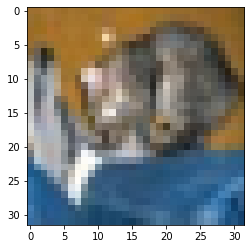

In [1]:
import time
import torch
from model import *
import matplotlib.pyplot as plt
import torchvision
from coder.ans_coder import *
import numpy as np
from tqdm import tqdm
from scipy.io import loadmat
%matplotlib inline 
device=torch.device("cpu")


test_data=torchvision.datasets.CIFAR10('../data/', train=False, download=False)
cifar_img=torch.tensor(test_data.data[:10,:,:,:]).permute(0,3,1,2)
plt.imshow(cifar_img[0].permute(1,2,0))
plt.show()

def get_param_size(model):
    total_params=sum(p.numel() for p in model.parameters())
    return total_params*4/(1024**2)

In [2]:
def test(all_img,p_prec,k=7):
    BPD_list=[]
    compression_time_list=[]
    decompression_time_list=[]
    for i in tqdm(range(0,all_img.size(0))):
        img=all_img[i].unsqueeze(0)
        start = time.time()
        ans_stack=cpu_ans_compression(net,img,32,32,k,p_prec)
        end = time.time()
        compression_time_list.append(end - start)
        
        BPD_list.append(ans_stack.get_length()/(32*32*3))

        start = time.time()
        decode_img=cpu_ans_decompression(net,ans_stack,32,32,k,p_prec)
        end = time.time()
        decompression_time_list.append(end - start)
        if (img-decode_img).sum().item()>0.:
            print('wrong')

    print('average compression time', np.mean(compression_time_list))
    print('average decompression time',np.mean(decompression_time_list))
    print('average BPD', np.mean(BPD_list))

### 0 ResNet Block

In [3]:
net = LocalPixelCNN(res_num=0, in_kernel = 7, in_channels=3, channels=256, out_channels=100).to(device)
net.load_state_dict(torch.load('./model_save/rs0_cifar_h3.pt',map_location=device))
print('parameter size:',get_param_size(net),'mb')
test(cifar_img,16)

  0%|          | 0/10 [00:00<?, ?it/s]

parameter size: 0.4925689697265625 mb


100%|██████████| 10/10 [00:15<00:00,  1.60s/it]

average compression time 0.812349820137024
average decompression time 0.7857677698135376
average BPD 3.5775065104166672


### 1 ResNet Block

In [4]:
net = LocalPixelCNN(res_num=1, in_kernel = 7, in_channels=3, channels=256, out_channels=100).to(device)
net.load_state_dict(torch.load('./model_save/rs1_cifar_h3.pt',map_location=device))
print('parameter size:',get_param_size(net),'mb')
test(cifar_img,16)

  0%|          | 0/10 [00:00<?, ?it/s]

parameter size: 1.2454986572265625 mb


100%|██████████| 10/10 [00:24<00:00,  2.47s/it]

average compression time 1.2213990211486816
average decompression time 1.2432503700256348
average BPD 3.47138671875


### 3 ResNet Blocks


In [5]:
net = LocalPixelCNN(res_num=3, in_kernel = 7, in_channels=3, channels=256, out_channels=100).to(device)
net.load_state_dict(torch.load('./model_save/rs3_cifar_h3.pt',map_location=device))
print('parameter size:',get_param_size(net),'mb')
test(cifar_img,16)

  0%|          | 0/10 [00:00<?, ?it/s]

parameter size: 2.7513580322265625 mb


100%|██████████| 10/10 [00:42<00:00,  4.30s/it]

average compression time 2.140776181221008
average decompression time 2.1548584699630737
average BPD 3.4286783854166663
